In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report


In [11]:
data = pd.read_csv('dava_sonuclari.csv')
data.head()
df = pd.read_csv("dava_sonuclari.csv")

## VERİ SETİ İNCELEME : 
Case Type: Davanın türü (Criminal, Civil, Commercial)  
Case Duration (Days): Davanın süresi (gün olarak)  
Judge Experience (Years): Hakimin deneyim yılı  
Number of Witnesses: Tanık sayısı  
Legal Fees (USD): Hukuk masrafları (USD olarak)  
Plaintiff's Reputation: Davacının itibarı (1: Düşük, 2: Orta, 3: Yüksek)  
Defendant's Wealth (USD): Davalının serveti  
Number of Evidence Items: Delil sayısı  
Number of Legal Precedents: İlgili hukuki emsal sayısı  
Settlement Offered (USD): Teklif edilen uzlaşma miktarı  
Severity: Davanın ciddiyet derecesi (1: Düşük, 2: Orta, 3: Yüksek)  
Outcome: Davanın sonucu (0: Kaybetmek, 1: Kazanmak)  

## Görevler

### Veri Ön İşleme:
* Veri setini inceleyin ve eksik veya aykırı değerler olup olmadığını kontrol edin.  
* Gerektiğinde eksik verileri doldurun veya çıkarın.  
* Özelliklerin ölçeklendirilmesi gibi gerekli veri dönüşümlerini uygulayın. 

### Veri Setini Ayırma:
* Veri setini eğitim ve test setleri olarak ayırın (örn. %80 eğitim, %20 test).  

### Model Kurulumu:
* Karar ağacı modelini oluşturun ve eğitim verileri üzerinde eğitin.

### Modeli Değerlendirme:
* Test verilerini kullanarak modelin doğruluğunu değerlendirin.
* Doğruluk, precision, recall ve F1-score gibi performans metriklerini hesaplayın.

### Sonuçları Görselleştirme:
* Karar ağacının yapısını görselleştirin.
* Karar ağacının nasıl çalıştığını ve hangi özelliklerin davanın sonucunu belirlemede en etkili olduğunu açıklayın.

              precision    recall  f1-score   support

      Suçsuz       1.00      0.95      0.97        40
       Suçlu       0.50      1.00      0.67         2

    accuracy                           0.95        42
   macro avg       0.75      0.97      0.82        42
weighted avg       0.98      0.95      0.96        42



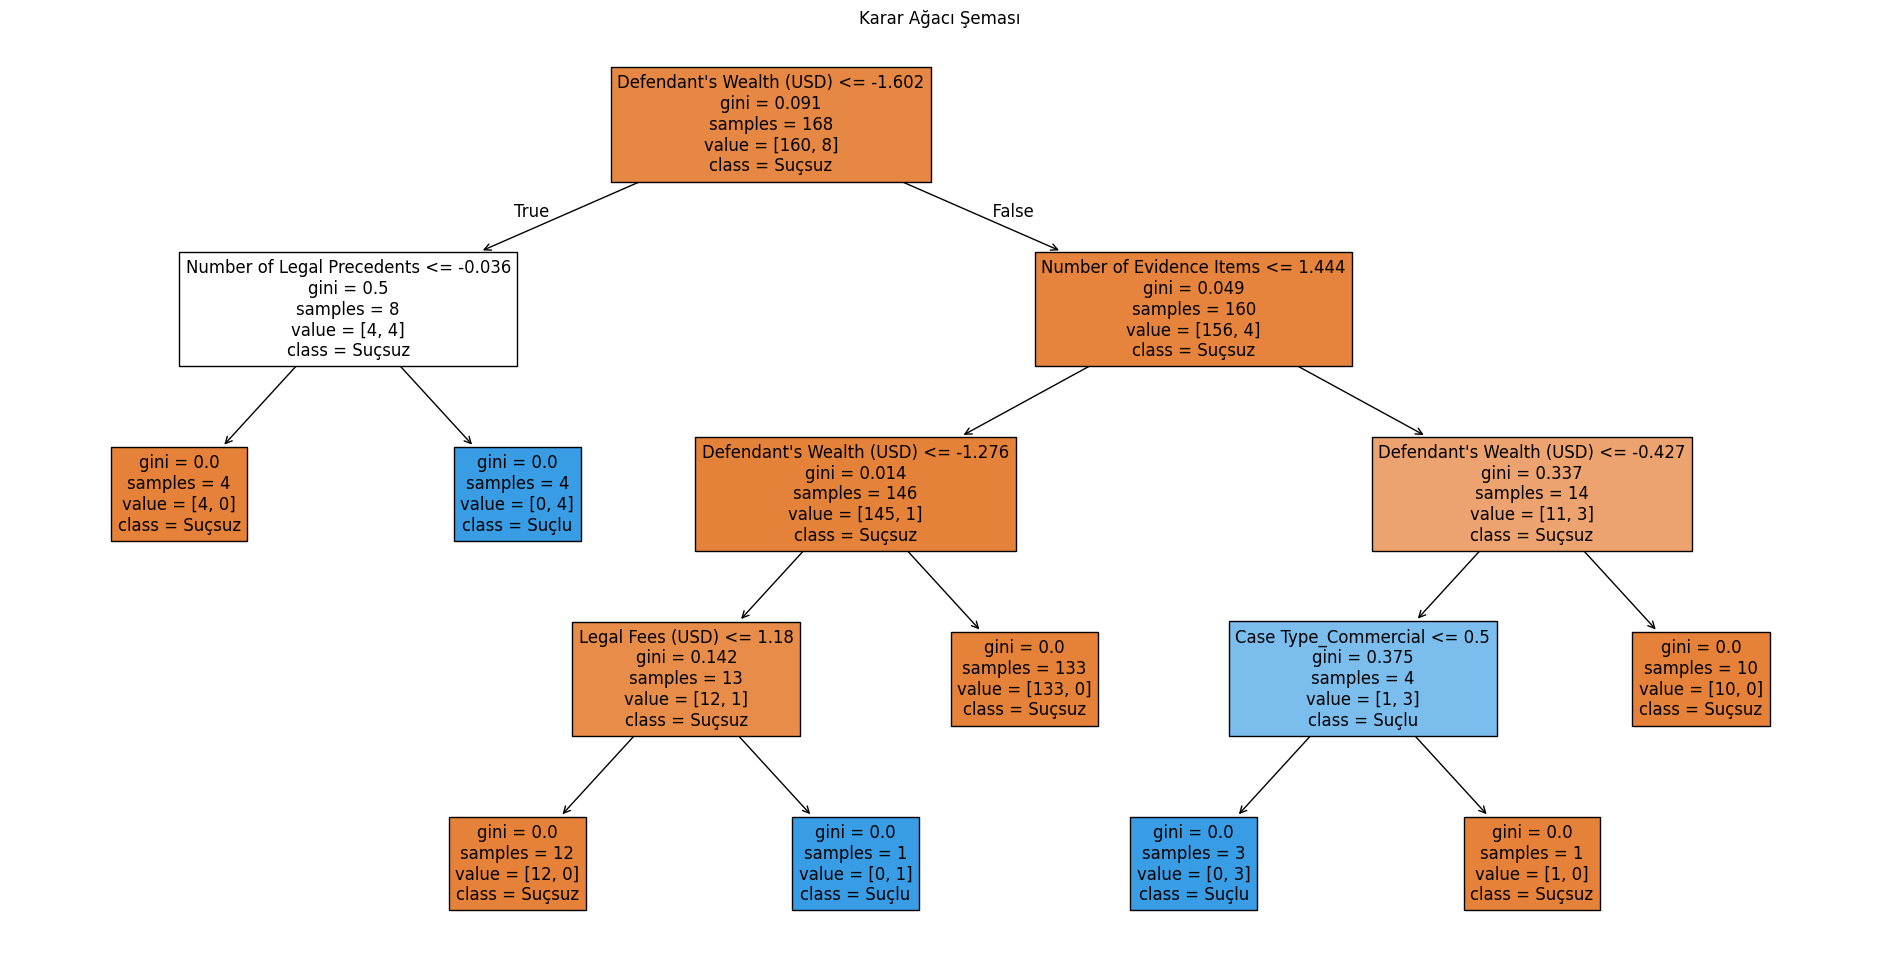

In [ ]:
# Yapay suçlu davaları ekle
synthetic_data = pd.DataFrame({
    "Case Type": np.random.choice(["Criminal"], size=10),
    "Case Duration (Days)": np.random.randint(180, 360, size=10),
    "Judge Experience (Years)": np.random.randint(15, 40, size=10),
    "Number of Witnesses": np.random.randint(12, 20, size=10),
    "Legal Fees (USD)": np.random.randint(35000, 50000, size=10),
    "Plaintiff's Reputation": np.random.choice([2, 3], size=10),
    "Defendant's Wealth (USD)": np.random.randint(20000, 300000, size=10),
    "Number of Evidence Items": np.random.randint(55, 100, size=10),
    "Number of Legal Precedents": np.random.randint(5, 10, size=10),
    "Settlement Offered (USD)": np.random.randint(0, 15000, size=10),
    "Severity": np.random.choice([2, 3], size=10),
    "Outcome": 1})

# Veriyi birleştir
df_augmented = pd.concat([df, synthetic_data], ignore_index=True)

# Özellikler ve hedef
X = df_augmented.drop("Outcome", axis=1)
y = df_augmented["Outcome"]

# Sütun türleri
categorical_features = ["Case Type"]
numeric_features = [col for col in X.columns if col not in categorical_features]

# Pipeline: ölçeklendirme + one-hot encoding + karar ağacı
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(), categorical_features)])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=4, random_state=42))])

# Eğitim/test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Eğit ve tahmin etme
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Sınıflandırma raporu
print(classification_report(y_test, y_pred, target_names=["Suçsuz", "Suçlu"]))

# Karar ağacını çizer
clf = pipeline.named_steps["classifier"]
feature_names = (
    numeric_features +
    list(pipeline.named_steps["preprocessor"]
         .named_transformers_["cat"]
         .get_feature_names_out(categorical_features)))

plt.figure(figsize=(24, 12))
plot_tree(clf, feature_names=feature_names, class_names=["Suçsuz", "Suçlu"], filled=True)
plt.title("Karar Ağacı Şeması")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Test verisi ile tahmin yapar
y_pred = pipeline.predict(X_test)

# Performans raporunu yazdırır
print(classification_report(y_test, y_pred, target_names=["Suçsuz", "Suçlu"]))


              precision    recall  f1-score   support

      Suçsuz       1.00      0.97      0.99        40
       Suçlu       0.67      1.00      0.80         2

    accuracy                           0.98        42
   macro avg       0.83      0.99      0.89        42
weighted avg       0.98      0.98      0.98        42



Karar ağacı veriyi dallara ayırarak sınıflandırır
İlk düğümler en etkili özelliklerdir
Ağaç görselleştirmesi, modelin nasıl karar verdiğini adım adım anlamanı sağlar.
Aşağıdaki değişkenler karar sürecinde kritik bir yol oluşturdular (karşılarında nasıl etkili oldukları yazılı)
`Number of Evidence Items` = Delil sayısı fazlaysa suçlu olma olasılığı arttırır                
 `Severity`                 = Davanın ciddiyeti yüksekse sonuç genelde daha olumsuz (suçlu) olur   
 `Settlement Offered (USD)` = Uzlaşma teklifinin düşük olması, davanın devam ettiğini gösterir 
 `Judge Experience`         = Tecrübeli hakimler karmaşık davaları farklı değerlendirir        
 `Defendant's Wealth`       = Savunma gücünü etkilendirir 
     


Özelliklerin modele katkı yüzdeleri:
Defendant's Wealth (USD): 44.58%
Number of Legal Precedents: 26.25%
Legal Fees (USD): 12.12%
Case Type_Commercial: 9.84%
Number of Evidence Items: 7.21%
Settlement Offered (USD): 0.00%
Severity: 0.00%
Case Type_Civil: 0.00%
Case Type_Criminal: 0.00%
Plaintiff's Reputation: 0.00%
Number of Witnesses: 0.00%
Judge Experience (Years): 0.00%
Case Duration (Days): 0.00%


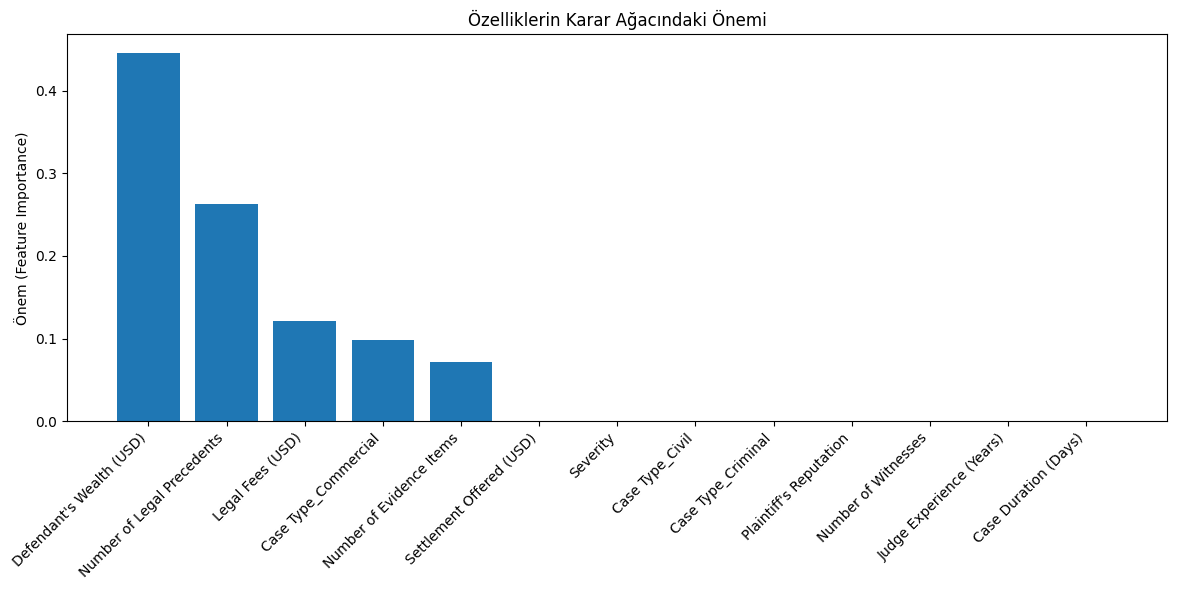

In [13]:
import numpy as np
import matplotlib.pyplot as plt

feature_names = (numeric_features + list(pipeline.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_features)))

importances = pipeline.named_steps["classifier"].feature_importances_

indices = np.argsort(importances)[::-1]
sorted_features = np.array(feature_names)[indices]
sorted_importances = importances[indices]

print("Özelliklerin modele katkı yüzdeleri:")
for name, score in zip(sorted_features, sorted_importances):
    print(f"{name}: {score:.2%}")

plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), sorted_importances, align="center")
plt.xticks(range(len(importances)), sorted_features, rotation=45, ha="right")
plt.title("Özelliklerin Karar Ağacındaki Önemi")
plt.ylabel("Önem (Feature Importance)")
plt.tight_layout()
plt.show()


Yukarıdaki kodda:

1) Karar ağacının hangi özelliği daha çok kullandığını yüzde (%) olarak gösterildi.

2) En etkili özellikleri sıralandı.

3) Sonuçları görsel bir çubuk grafikle sunuldu.